# Create Recommender Engine

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

In [ ]:
# Mount GDrive folders
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set home directory
import os
home_dir = "drive/MyDrive/Colab Notebooks/Sprint 3/"
os.chdir(home_dir)

## 1. Read the recommendation pool

In [ ]:
# read data
rec_pool_df = pd.read_csv("data/hale_tracks_rec_pool.csv")
rec_pool_df

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,predicted_genre,predicted_genre_proba,genre_classical_proba,genre_country_proba,genre_electronic_proba,genre_jazz_proba,genre_r&b_proba,genre_rap_proba,genre_reggae_proba,genre_rock_proba
0,4S1DcySs2qHEggSlceBmvl,0.580,0.664,9,-6.541,1,0.0316,0.42400,0.323000,0.1280,...,electronic,0.358,0.074,0.128,0.358,0.070,0.056,0.014,0.002,0.298
1,40b9yd2XrcYXuJkoW9bHIr,0.312,0.514,7,-7.213,1,0.0332,0.09910,0.000169,0.1120,...,rock,0.500,0.044,0.310,0.050,0.026,0.052,0.016,0.002,0.500
2,5KFFqtixyLrREHz3iiU9jw,0.588,0.490,4,-6.401,1,0.0344,0.30400,0.025000,0.0720,...,country,0.354,0.028,0.354,0.032,0.040,0.216,0.012,0.026,0.292
3,08hFNg8Oz3lvaAms7qrIif,0.556,0.563,4,-6.591,1,0.0320,0.51100,0.000000,0.1190,...,country,0.626,0.000,0.626,0.064,0.014,0.052,0.036,0.018,0.190
4,4fnBf4JSGxnVw3cPED47Xt,0.644,0.626,2,-5.633,1,0.0372,0.22400,0.000237,0.2190,...,electronic,0.264,0.000,0.212,0.264,0.008,0.166,0.154,0.056,0.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1tgAF6zLIOBksB0dmpVM9O,0.400,0.269,6,-11.763,1,0.0290,0.83800,0.000053,0.0859,...,country,0.434,0.034,0.434,0.010,0.408,0.064,0.006,0.000,0.044
79,6RXbOOGqxPMr99pEbaJjOC,0.586,0.601,7,-9.111,1,0.0493,0.38900,0.002840,0.0881,...,rock,0.550,0.000,0.094,0.038,0.062,0.138,0.094,0.024,0.550
80,6CHpr3pY2MbJ5y1076UDnI,0.424,0.221,4,-9.279,1,0.0351,0.88200,0.000000,0.1340,...,jazz,0.410,0.016,0.350,0.002,0.410,0.136,0.042,0.000,0.044
81,13XyijaeNt2iThYc36UJXC,0.616,0.853,11,-8.607,1,0.0438,0.00009,0.698000,0.0212,...,rock,0.554,0.008,0.012,0.320,0.048,0.020,0.004,0.034,0.554


In [ ]:
rec_pool_df.shape

(83, 29)

## 2. Input Seed Track


The **seed track** is the track that will serve as input to the recommender engine. The recommender engine will attempt to generate recommendations from the pool based on their similarity to the seed track.

>Q: Pick a track of choice and use this as seed track

In [ ]:
seed_track_data = rec_pool_df[rec_pool_df['track_name']=="The Day You Said Goodnight"].iloc[0]
seed_track_data#[feature_cols]

track_id                      08hFNg8Oz3lvaAms7qrIif
danceability                                   0.556
energy                                         0.563
key                                                4
loudness                                      -6.591
mode                                               1
speechiness                                    0.032
acousticness                                   0.511
instrumentalness                                 0.0
liveness                                       0.119
valence                                        0.238
tempo                                        134.259
duration_ms                                   291320
track_name                The Day You Said Goodnight
album_id                      3rYydzqOp83YUYh4EXjrbk
album_name                                      Hale
popularity                                        73
release_date                                    2005
predicted_genre_id                            

## 3. Explore Similarity Measures

We will use 3 similarity measures for our recommender engine. These are usually expressed as a distance metric. The smaller these quantities are, the closer the two points are.

**Euclidean distance**- It is the straight-line distance between two points in Euclidean space. In other words, it is the length of the shortest path between two points in a straight line. It is calculated as the square root of the sum of the squared differences between each corresponding dimension of the two points.

**Manhattan distance**- It is also known as taxicab distance or L1 distance. It measures the distance between two points by summing the absolute differences between each corresponding dimension of the two points. It represents the distance between two points as if a person were walking on the streets of Manhattan, where the shortest path between two points is always a right-angled path.

**Cosine distance**- It measures the cosine of the angle between two vectors in a high-dimensional space. It calculates the similarity between two vectors rather than the distance. It is often used to compare the similarity between text documents or to determine the similarity between two images.

In [ ]:
# Audio feature cols
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
# Genre probability cols
genre_proba_cols = [col for col in rec_pool_df.columns if col.startswith('genre_')]

Compute distances

In [ ]:
def get_distances(x,y):
    euclidean_dist =  euclidean_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    manhattan_dist =  manhattan_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    cosine_dist = 1 - cosine_similarity(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    return [euclidean_dist,manhattan_dist,cosine_dist]

In [ ]:
rec_pool_df['all_distances_features'] = rec_pool_df.apply(lambda x: get_distances(x[feature_cols],\
                                                                           seed_track_data[feature_cols]), axis=1)

In [ ]:
dist_feature_cols = ['euclidean_dist_features','manhattan_dist_features', 'cosine_dist_features']
rec_pool_df[dist_feature_cols] = rec_pool_df['all_distances_features'].apply(pd.Series)
rec_pool_df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_electronic_proba,genre_jazz_proba,genre_r&b_proba,genre_rap_proba,genre_reggae_proba,genre_rock_proba,all_distances_features,euclidean_dist_features,manhattan_dist_features,cosine_dist_features
0,4S1DcySs2qHEggSlceBmvl,0.580,0.664,9,-6.541,1,0.0316,0.4240,0.323000,0.128,...,0.358,0.070,0.056,0.014,0.002,0.298,"[2.0315277896216823, 2.6374, 3.638926263649367...",2.031528,2.637400,3.638926e-06
1,40b9yd2XrcYXuJkoW9bHIr,0.312,0.514,7,-7.213,1,0.0332,0.0991,0.000169,0.112,...,0.050,0.026,0.052,0.016,0.002,0.500,"[6.640737464963252, 7.934269000000022, 9.04230...",6.640737,7.934269,9.042309e-06
2,5KFFqtixyLrREHz3iiU9jw,0.588,0.490,4,-6.401,1,0.0344,0.3040,0.025000,0.072,...,0.032,0.040,0.216,0.012,0.026,0.292,"[59.10481881166715, 59.77339999999999, 0.00065...",59.104819,59.773400,6.576412e-04
3,08hFNg8Oz3lvaAms7qrIif,0.556,0.563,4,-6.591,1,0.0320,0.5110,0.000000,0.119,...,0.064,0.014,0.052,0.036,0.018,0.190,"[2.6973983046972182e-06, 0.0, 2.22044604925031...",0.000003,0.000000,2.220446e-16
4,4fnBf4JSGxnVw3cPED47Xt,0.644,0.626,2,-5.633,1,0.0372,0.2240,0.000237,0.219,...,0.264,0.008,0.166,0.154,0.056,0.140,"[15.85148330902104, 17.40343699999999, 5.00219...",15.851483,17.403437,5.002199e-06


View histograms of the 3 similarity measures

array([[<Axes: title={'center': 'euclidean_dist_features'}>,
        <Axes: title={'center': 'manhattan_dist_features'}>],
       [<Axes: title={'center': 'cosine_dist_features'}>, <Axes: >]],
      dtype=object)

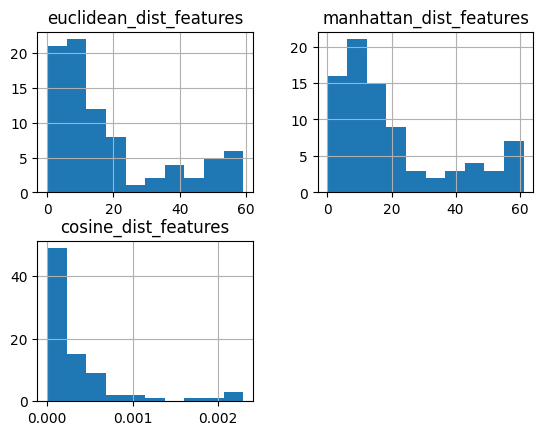

In [ ]:
rec_pool_df[dist_feature_cols].hist()

## 4. Build engine and generate recommendations

 - We will output recommended tracks based on the seed track using the following recommender engine builds

    - Build 1. Audio features only
    - Build 2. Audio features and with same predicted genre
    - Build 3. Predicted genre probabilities only
    - Build 4. Audio features and predicted genre probabilities

##### 4.1. Build 1 - Use audio features only
4.1.1. Euclidean distance

In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist_features')[:10]
recommendation_df[['track_id','track_name','euclidean_dist_features','predicted_genre']]

,track_id,track_name,euclidean_dist_features,predicted_genre
48,1Yg0Q7i9IcYweLvQMsnsEt,The Day You Said Goodnight,0.000003,country
32,6gPWMZ2zgZIQ5q0f04lNKW,Requim,1.220380,rock
7,28OGggCTRpZFpKcK2PblOQ,Life Support,1.644631,rock
20,6t6sNZubJB1XnzOeQZiyFO,Shooting Star,1.717845,country
15,1wgWjgF74fcU3felXyRsoe,The Ballad Of,1.868124,country
55,7bjkgKrE6jIBqqTfNIyaSJ,The Ballad Of,1.971890,country
0,4S1DcySs2qHEggSlceBmvl,Take No,2.031528,electronic
50,2e38g1XbyKcEEU8rkozQjF,Kung Wala Ka,2.222581,country
11,4he4CYDhvSPTxQc0e0Le1L,Kung Wala Ka,2.222581,country
54,0dWkczfLfMIpbycQejhHcG,Shooting Star,2.410049,country


4.1.2. Manhattan distance

In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist_features')[:10]
recommendation_df[['track_id','track_name','manhattan_dist_features','predicted_genre']]

,track_id,track_name,manhattan_dist_features,predicted_genre
48,1Yg0Q7i9IcYweLvQMsnsEt,The Day You Said Goodnight,0.000000,country
32,6gPWMZ2zgZIQ5q0f04lNKW,Requim,1.809210,rock
7,28OGggCTRpZFpKcK2PblOQ,Life Support,2.305600,rock
20,6t6sNZubJB1XnzOeQZiyFO,Shooting Star,2.306111,country
55,7bjkgKrE6jIBqqTfNIyaSJ,The Ballad Of,2.372567,country
15,1wgWjgF74fcU3felXyRsoe,The Ballad Of,2.510021,country
0,4S1DcySs2qHEggSlceBmvl,Take No,2.637400,electronic
54,0dWkczfLfMIpbycQejhHcG,Shooting Star,3.081307,country
50,2e38g1XbyKcEEU8rkozQjF,Kung Wala Ka,3.333587,country
11,4he4CYDhvSPTxQc0e0Le1L,Kung Wala Ka,3.333587,country


4.1.3. Cosine distance

In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_features')[:10]
recommendation_df[['track_id','track_name','cosine_dist_features','predicted_genre']]

,track_id,track_name,cosine_dist_features,predicted_genre
48,1Yg0Q7i9IcYweLvQMsnsEt,The Day You Said Goodnight,2.220446e-16,country
55,7bjkgKrE6jIBqqTfNIyaSJ,The Ballad Of,1.669823e-06,country
32,6gPWMZ2zgZIQ5q0f04lNKW,Requim,1.833327e-06,rock
15,1wgWjgF74fcU3felXyRsoe,The Ballad Of,2.815245e-06,country
0,4S1DcySs2qHEggSlceBmvl,Take No,3.638926e-06,electronic
33,45KY0RdS5fsQEk5iar2mXo,Back from Beginning,3.707905e-06,country
4,4fnBf4JSGxnVw3cPED47Xt,Wishing,5.002199e-06,electronic
1,40b9yd2XrcYXuJkoW9bHIr,Broken Sonnet,9.042309e-06,rock
18,4pHbHvPz7QlelXppuumEJ5,Eyes Wide Shut,9.138156e-06,rap
50,2e38g1XbyKcEEU8rkozQjF,Kung Wala Ka,1.129753e-05,country


##### 4.2. Build 2 - Audio features and with same predicted genre

In [ ]:
recommendation_df = rec_pool_df[rec_pool_df['predicted_genre']==seed_track_data['predicted_genre']]\
                                    [rec_pool_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist_features')[:10]
recommendation_df[['track_id','track_name','cosine_dist_features','predicted_genre']]

<ipython-input-21-d3c4c9af8068>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = rec_pool_df[rec_pool_df['predicted_genre']==seed_track_data['predicted_genre']]\


,track_id,track_name,cosine_dist_features,predicted_genre
48,1Yg0Q7i9IcYweLvQMsnsEt,The Day You Said Goodnight,2.220446e-16,country
55,7bjkgKrE6jIBqqTfNIyaSJ,The Ballad Of,1.669823e-06,country
15,1wgWjgF74fcU3felXyRsoe,The Ballad Of,2.815245e-06,country
33,45KY0RdS5fsQEk5iar2mXo,Back from Beginning,3.707905e-06,country
11,4he4CYDhvSPTxQc0e0Le1L,Kung Wala Ka,1.129753e-05,country
50,2e38g1XbyKcEEU8rkozQjF,Kung Wala Ka,1.129753e-05,country
41,0edD4S78cz8DYmPUz9xnye,Aso't Pusa,1.789764e-05,country
12,1OdS3rdw5nHIqVNwsZKwj4,Last Song,2.810705e-05,country
8,6VmPwQRaIzk6LV5HihJTVV,Underneath the Waves,4.980691e-05,country
5,2NS8ng4tzX7LNudqnxwBvJ,Here Tonight,7.557947e-05,country


##### 4.3. Build 3 - Predicted genre probabilities

In [ ]:
rec_pool_df['all_distances_proba'] = rec_pool_df.apply(lambda x: get_distances(x[genre_proba_cols],\
                                                                           seed_track_data[genre_proba_cols]), axis=1)

In [ ]:
dist_proba_cols = ['euclidean_dist_proba','manhattan_dist_proba', 'cosine_dist_proba']
rec_pool_df[dist_proba_cols] = rec_pool_df['all_distances_proba'].apply(pd.Series)
rec_pool_df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_reggae_proba,genre_rock_proba,all_distances_features,euclidean_dist_features,manhattan_dist_features,cosine_dist_features,all_distances_proba,euclidean_dist_proba,manhattan_dist_proba,cosine_dist_proba
0,4S1DcySs2qHEggSlceBmvl,0.580,0.664,9,-6.541,1,0.0316,0.4240,0.323000,0.128,...,0.002,0.298,"[2.0315277896216823, 2.6374, 3.638926263649367...",2.031528,2.637400,3.638926e-06,"[0.5962147264199368, 1.072, 0.5003742797209196]",5.962147e-01,1.072,5.003743e-01
1,40b9yd2XrcYXuJkoW9bHIr,0.312,0.514,7,-7.213,1,0.0332,0.0991,0.000169,0.112,...,0.002,0.500,"[6.640737464963252, 7.934269000000022, 9.04230...",6.640737,7.934269,9.042309e-06,"[0.4459686087607512, 0.732, 0.24741385579155395]",4.459686e-01,0.732,2.474139e-01
2,5KFFqtixyLrREHz3iiU9jw,0.588,0.490,4,-6.401,1,0.0344,0.3040,0.025000,0.072,...,0.026,0.292,"[59.10481881166715, 59.77339999999999, 0.00065...",59.104819,59.773400,6.576412e-04,"[0.3382425165469298, 0.6560000000000001, 0.136...",3.382425e-01,0.656,1.362717e-01
3,08hFNg8Oz3lvaAms7qrIif,0.556,0.563,4,-6.591,1,0.0320,0.5110,0.000000,0.119,...,0.018,0.190,"[2.6973983046972182e-06, 0.0, 2.22044604925031...",0.000003,0.000000,2.220446e-16,"[1.0536712127723509e-08, 0.0, 1.11022302462515...",1.053671e-08,0.000,1.110223e-16
4,4fnBf4JSGxnVw3cPED47Xt,0.644,0.626,2,-5.633,1,0.0372,0.2240,0.000237,0.219,...,0.056,0.140,"[15.85148330902104, 17.40343699999999, 5.00219...",15.851483,17.403437,5.002199e-06,"[0.49223571589229487, 0.9400000000000002, 0.33...",4.922357e-01,0.940,3.328243e-01


In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_proba')[:10]
recommendation_df[['track_id','track_name','cosine_dist_proba','predicted_genre']]

,track_id,track_name,cosine_dist_proba,predicted_genre
48,1Yg0Q7i9IcYweLvQMsnsEt,The Day You Said Goodnight,1.110223e-16,country
55,7bjkgKrE6jIBqqTfNIyaSJ,The Ballad Of,3.228012e-03,country
27,3HcMCjfoT5gzGWDf85xOcs,This Is a Happy Song,3.849573e-03,country
12,1OdS3rdw5nHIqVNwsZKwj4,Last Song,9.417008e-03,country
36,347xje41T3cLgIT0ZKhx1I,Hagatna Bay,1.282790e-02,country
5,2NS8ng4tzX7LNudqnxwBvJ,Here Tonight,1.692968e-02,country
15,1wgWjgF74fcU3felXyRsoe,The Ballad Of,1.922165e-02,country
33,45KY0RdS5fsQEk5iar2mXo,Back from Beginning,5.900704e-02,country
41,0edD4S78cz8DYmPUz9xnye,Aso't Pusa,6.692838e-02,country
8,6VmPwQRaIzk6LV5HihJTVV,Underneath the Waves,7.030357e-02,country


##### 4.4. Build 4 - Audio features and predicted genre probabilities

In [ ]:
cols = feature_cols + genre_proba_cols
rec_pool_df['all_distances_all'] = rec_pool_df.apply(lambda x: get_distances(x[cols],\
                                                                           seed_track_data[cols]), axis=1)

In [ ]:
dist_all_cols = ['euclidean_dist_all','manhattan_dist_all', 'cosine_dist_all']
rec_pool_df[dist_all_cols] = rec_pool_df['all_distances_all'].apply(pd.Series)
rec_pool_df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,manhattan_dist_features,cosine_dist_features,all_distances_proba,euclidean_dist_proba,manhattan_dist_proba,cosine_dist_proba,all_distances_all,euclidean_dist_all,manhattan_dist_all,cosine_dist_all
0,4S1DcySs2qHEggSlceBmvl,0.580,0.664,9,-6.541,1,0.0316,0.4240,0.323000,0.128,...,2.637400,3.638926e-06,"[0.5962147264199368, 1.072, 0.5003742797209196]",5.962147e-01,1.072,5.003743e-01,"[2.117209758148012, 3.7093999999999996, 1.3545...",2.117210,3.709400,0.000014
1,40b9yd2XrcYXuJkoW9bHIr,0.312,0.514,7,-7.213,1,0.0332,0.0991,0.000169,0.112,...,7.934269,9.042309e-06,"[0.4459686087607512, 0.732, 0.24741385579155395]",4.459686e-01,0.732,2.474139e-01,"[6.65569546167396, 8.666269000000021, 1.441570...",6.655695,8.666269,0.000014
2,5KFFqtixyLrREHz3iiU9jw,0.588,0.490,4,-6.401,1,0.0344,0.3040,0.025000,0.072,...,59.773400,6.576412e-04,"[0.3382425165469298, 0.6560000000000001, 0.136...",3.382425e-01,0.656,1.362717e-01,"[59.10578664361048, 60.42939999999999, 0.00066...",59.105787,60.429400,0.000664
3,08hFNg8Oz3lvaAms7qrIif,0.556,0.563,4,-6.591,1,0.0320,0.5110,0.000000,0.119,...,0.000000,2.220446e-16,"[1.0536712127723509e-08, 0.0, 1.11022302462515...",1.053671e-08,0.000,1.110223e-16,"[0.0, 0.0, 0.0]",0.000000,0.000000,0.000000
4,4fnBf4JSGxnVw3cPED47Xt,0.644,0.626,2,-5.633,1,0.0372,0.2240,0.000237,0.219,...,17.403437,5.002199e-06,"[0.49223571589229487, 0.9400000000000002, 0.33...",4.922357e-01,0.940,3.328243e-01,"[15.859124159176298, 18.34343699999999, 1.1778...",15.859124,18.343437,0.000012


In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_all')[:10]
rf_df = recommendation_df[['track_id','track_name','cosine_dist_all','predicted_genre']]
rf_df

,track_id,track_name,cosine_dist_all,predicted_genre
48,1Yg0Q7i9IcYweLvQMsnsEt,The Day You Said Goodnight,0.000000,country
55,7bjkgKrE6jIBqqTfNIyaSJ,The Ballad Of,0.000002,country
15,1wgWjgF74fcU3felXyRsoe,The Ballad Of,0.000003,country
33,45KY0RdS5fsQEk5iar2mXo,Back from Beginning,0.000005,country
32,6gPWMZ2zgZIQ5q0f04lNKW,Requim,0.000007,rock
4,4fnBf4JSGxnVw3cPED47Xt,Wishing,0.000012,electronic
50,2e38g1XbyKcEEU8rkozQjF,Kung Wala Ka,0.000013,country
11,4he4CYDhvSPTxQc0e0Le1L,Kung Wala Ka,0.000013,country
0,4S1DcySs2qHEggSlceBmvl,Take No,0.000014,electronic
1,40b9yd2XrcYXuJkoW9bHIr,Broken Sonnet,0.000014,rock


In [ ]:
df_no_duplicates = rf_df.drop_duplicates(subset=['track_name'])
df_no_duplicates

,track_id,track_name,cosine_dist_all,predicted_genre
48,1Yg0Q7i9IcYweLvQMsnsEt,The Day You Said Goodnight,0.000000,country
55,7bjkgKrE6jIBqqTfNIyaSJ,The Ballad Of,0.000002,country
33,45KY0RdS5fsQEk5iar2mXo,Back from Beginning,0.000005,country
32,6gPWMZ2zgZIQ5q0f04lNKW,Requim,0.000007,rock
4,4fnBf4JSGxnVw3cPED47Xt,Wishing,0.000012,electronic
50,2e38g1XbyKcEEU8rkozQjF,Kung Wala Ka,0.000013,country
0,4S1DcySs2qHEggSlceBmvl,Take No,0.000014,electronic
1,40b9yd2XrcYXuJkoW9bHIr,Broken Sonnet,0.000014,rock


In [ ]:
df_no_duplicates[df_no_duplicates.index != 48]

,track_id,track_name,cosine_dist_all,predicted_genre
55,7bjkgKrE6jIBqqTfNIyaSJ,The Ballad Of,0.000002,country
33,45KY0RdS5fsQEk5iar2mXo,Back from Beginning,0.000005,country
32,6gPWMZ2zgZIQ5q0f04lNKW,Requim,0.000007,rock
4,4fnBf4JSGxnVw3cPED47Xt,Wishing,0.000012,electronic
50,2e38g1XbyKcEEU8rkozQjF,Kung Wala Ka,0.000013,country
0,4S1DcySs2qHEggSlceBmvl,Take No,0.000014,electronic
1,40b9yd2XrcYXuJkoW9bHIr,Broken Sonnet,0.000014,rock


In [ ]:
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_all')[:10]
recommendation_df[['album_name','track_id','track_name','cosine_dist_all','predicted_genre']]

,album_name,track_id,track_name,cosine_dist_all,predicted_genre
48,Hale The Complete Hits,1Yg0Q7i9IcYweLvQMsnsEt,The Day You Said Goodnight,0.000000,country
55,Hale The Complete Hits,7bjkgKrE6jIBqqTfNIyaSJ,The Ballad Of,0.000002,country
15,Twilight,1wgWjgF74fcU3felXyRsoe,The Ballad Of,0.000003,country
33,"Above, Over and Beyond",45KY0RdS5fsQEk5iar2mXo,Back from Beginning,0.000005,country
32,"Above, Over and Beyond",6gPWMZ2zgZIQ5q0f04lNKW,Requim,0.000007,rock
4,Hale,4fnBf4JSGxnVw3cPED47Xt,Wishing,0.000012,electronic
50,Hale The Complete Hits,2e38g1XbyKcEEU8rkozQjF,Kung Wala Ka,0.000013,country
11,Hale,4he4CYDhvSPTxQc0e0Le1L,Kung Wala Ka,0.000013,country
0,Hale,4S1DcySs2qHEggSlceBmvl,Take No,0.000014,electronic
1,Hale,40b9yd2XrcYXuJkoW9bHIr,Broken Sonnet,0.000014,rock
